In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import numpy
import astrohack_projections
#numpy.random.seed(42)

# create crazy looking Gaussian for the 3D model
basevar = 0.5 * numpy.eye(3)

gal_model = astrohack_projections.galaxy_model_3d()
v = [3., 0., 0.]
gal_model.add_gaussian(1.0, numpy.array([0., -1., 0.]), basevar + numpy.outer(v,v))
v = [-1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([2., 1., 0.]), basevar + numpy.outer(v,v))
v = [1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([-2., 1., 0.]), basevar + numpy.outer(v,v))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

vmin = None

for i in xrange(32):
    image = astrohack_projections.image_and_model()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, size=3)
    intensity = numpy.random.uniform(100.0, 150.0)
    scale = 0.25 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(13., 16.)
    yshift = numpy.random.uniform(18., 21.)

    image = astrohack_projections.image_and_model()
    image.set_shape((30, 40))
    image.set_psf(psf)
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.construct_synthetic()
    image.set_data(image.get_synthetic() + numpy.random.normal(size=image.get_shape()) / numpy.sqrt(image.ivar))

    # save to album
    album.add_image(image)
print len(album)

32


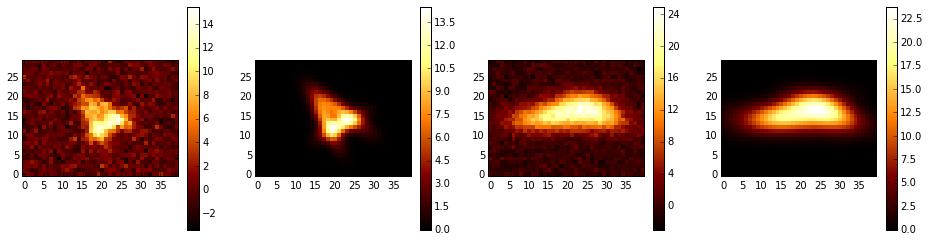

In [59]:
def showme(album):
    plt.rcParams['figure.figsize'] = 20, 80
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(16, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(image.get_data(), vmin=vmin, vmax=vmax, **plot_kwargs)
        plt.colorbar()
        plt.subplot(16, 4, 2*i+2)
        plt.imshow(image.get_synthetic(), vmin=vmin, vmax=vmax, **plot_kwargs)
        plt.colorbar()
        
#showme(album)

def showme_small(album, v=False):
    plt.rcParams['figure.figsize'] = 16, 4
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for j, i in enumerate([8, 9]):
        image = album.get_all_images()[i]
        plt.subplot(1, 4, 2*j+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        if v==True:
            vmin = None
            vmax = None
        plt.imshow(image.get_data(), vmin=vmin, vmax=vmax, **plot_kwargs)
        plt.colorbar()
        plt.subplot(1, 4, 2*j+2)
        plt.imshow(image.get_synthetic(), vmin=vmin, vmax=vmax, **plot_kwargs)
        plt.colorbar()  

#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/synthetic_start.png")

album before 668128.291089
image before 37704.6079521
image before 23566.7588776
image before 20018.3389977
image before 100141.449611
image before 55335.5385039
image before 6743.63773778
image before 25581.2379792
image before 12969.7994351
image before 9013.16951786
image before 50363.2354238
image before 24101.3030206
image before 9107.55005492
image before 14065.9283294
image before 32742.6856729
image before 14451.8206094
image before 23503.6272367
image before 24689.3692808
image before 21266.8859189
image before 23746.9343099
image before 16501.4737569
image before 19016.4879965
image before 11149.2468324
image before 32024.1930011
image before 15969.3335987
image before 37899.0786314
image before 45720.3158597
image before 81972.9259302
image before 29515.4961173
image before 5652.65703215
image before 12048.843995
image before 30229.8397635
image before 47420.2630442


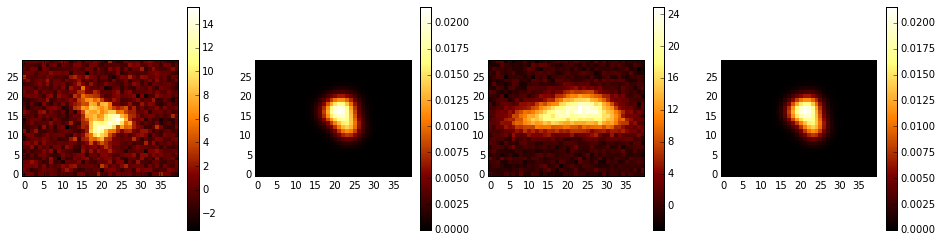

In [60]:
# INITIALIZATION BLOCK!
import scipy.optimize as op

galpar0 = numpy.array([1., 2., 0., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 2., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 0., 2., 1., 1., 1., 0., 0., 0.])
imgpar0 = (10., 30., 30., 0.1, 0.5, 14., 20., 0.)

print "album before", album(galpar0)
for image in album:
    print "image before", image(imgpar0)
    
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/initialise.png")

album before 914234.034029
  status: 0
 success: True
   direc: array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
     

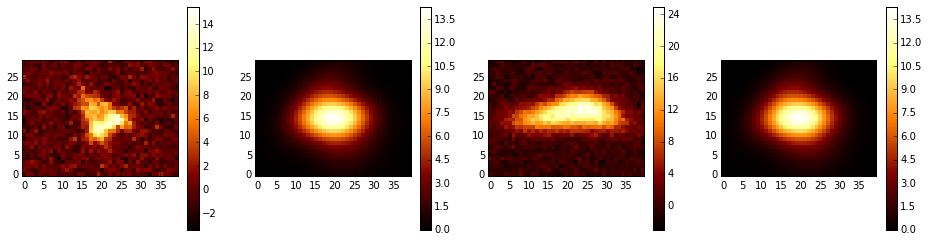

In [61]:
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
print result
galpar = result['x']
print "album after", album(galpar)

showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_1.pdf")

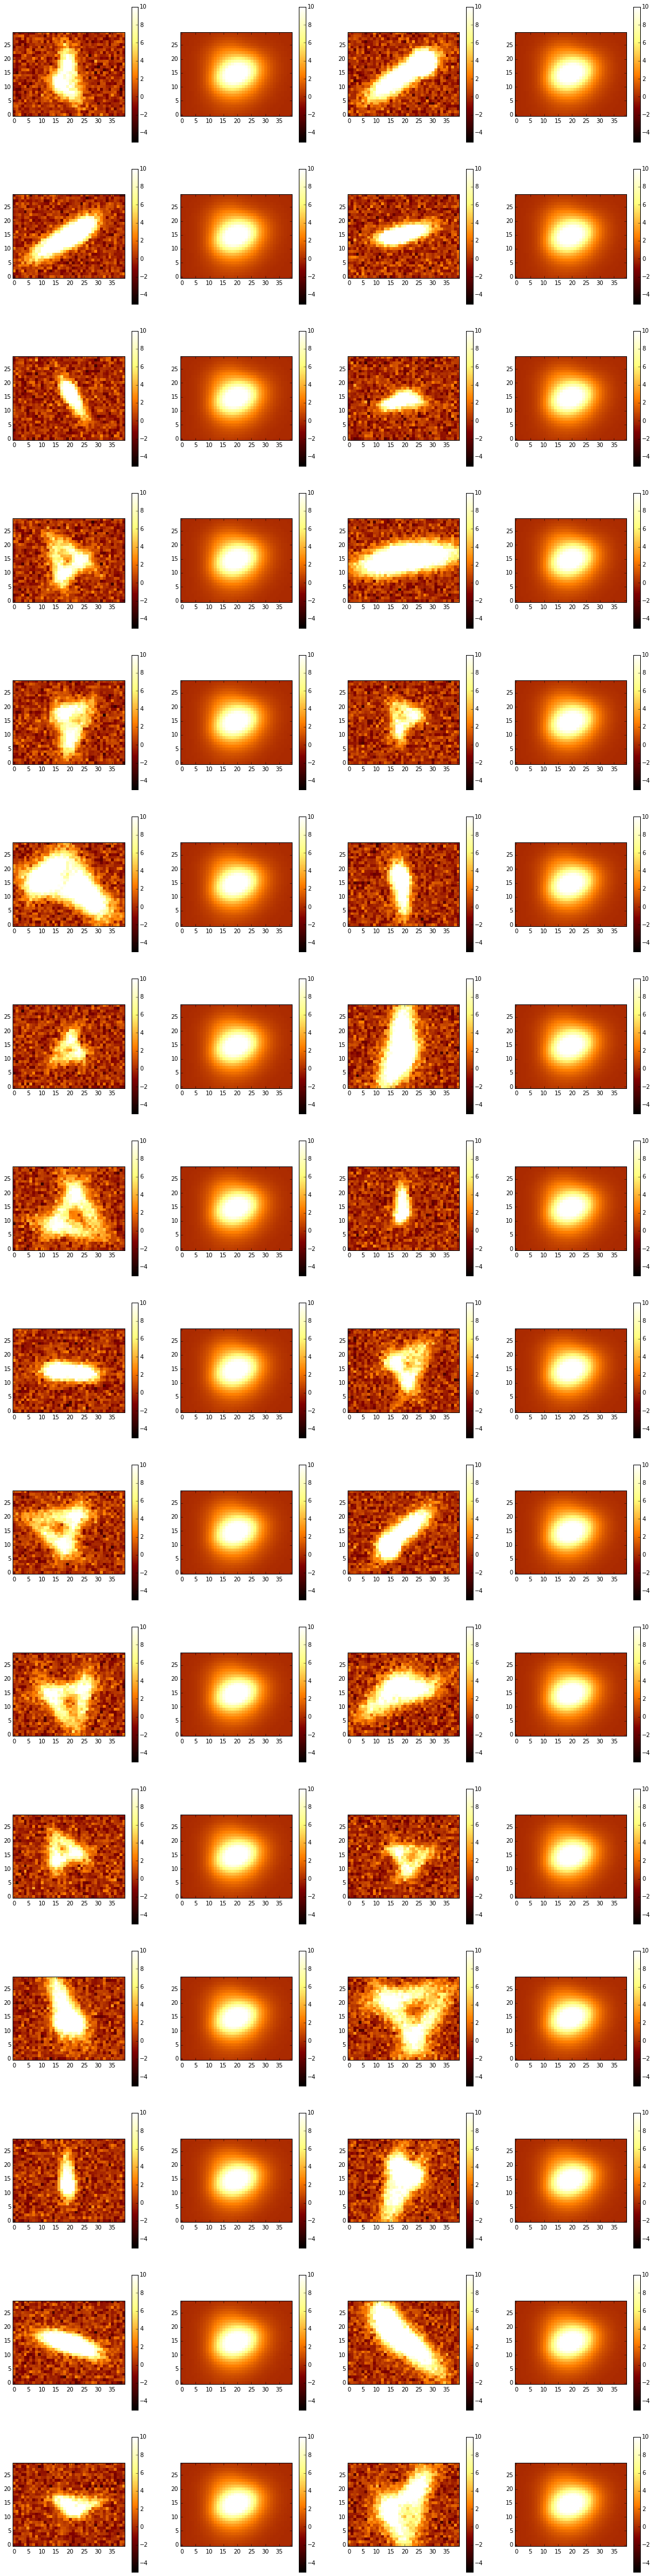

In [8]:
showme(album)

image before 15790.9345819
image after 8632.2600806
image before 13698.9118976
image after 2407.96573215
image before 12245.3542729
image after 1703.47223939
image before 45832.7632071
image after 9107.29541504
image before 22178.0873002
image after 1979.02887876
image before 8789.61718631
image after 1641.38159662
image before 10333.7480573
image after 4130.35656398
image before 8993.3116844
image after 1892.1849909
image before 6422.86295608
image after 2150.83584609
image before 17756.4804249
image after 3118.24493389
image before 7805.13002888
image after 3997.27555696
image before 8028.90483861
image after 1650.49083735
image before 7886.50642038
image after 2731.90768553
image before 10049.47315
image after 5999.91723955
image before 7460.6766957
image after 4131.62537819
image before 7771.63074971
image after 4896.474454
image before 8417.66441204
image after 2235.89452324
image before 6904.7912621
image after 4507.04775516
image before 7084.48288954
image after 4532.01371641
im

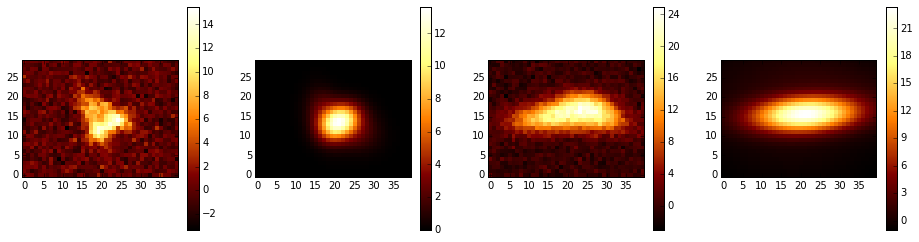

In [62]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_2.pdf")

album before 130956.957877
  status: 0
 success: True
   direc: array([[ -3.05929630e+01,   3.12313996e-02,   6.94959521e-02,
         -1.23786635e-02,   3.10592443e-02,   3.00279903e-01,
         -6.73398569e-03,   6.71175294e-02,  -1.12046032e-03,
         -2.37307486e-05,  -1.47388560e+01,   1.43423859e-01,
          8.86478231e-02,   4.99474387e-02,   1.02682252e+00,
         -3.27564432e-01,   3.51289467e-01,  -1.22623348e+00,
          1.45564343e-03,  -3.66336096e-01,   2.59755719e+01,
         -3.04612543e-01,   6.00273664e-02,  -2.38892252e-02,
         -3.16900445e+00,   3.39376959e-02,  -1.14821540e-01,
          1.77494526e-02,   4.21507587e-01,  -7.28246677e-03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
     

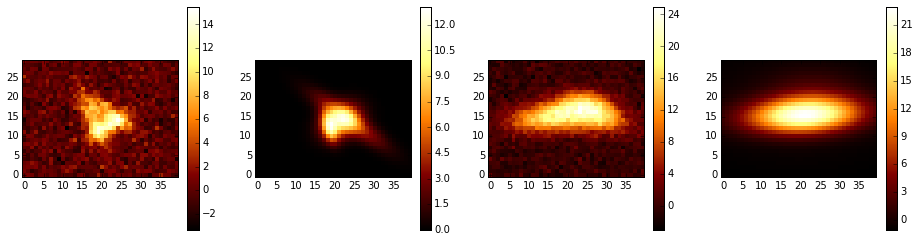

In [63]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
print result
galpar = result['x']
print "album after", album(galpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_3.pdf")

image before 6663.23385965
image after 5301.14608912
image before 2323.20505914
image after 2202.92728969
image before 2041.7124058
image after 1918.85454986
image before 8218.79382761
image after 6590.89329027
image before 2237.04724241
image after 1881.75142603
image before 1446.61472265
image after 1406.9953221
image before 2695.99158273
image after 2619.34760253
image before 1518.62468701
image after 1424.75790649
image before 2000.81885935
image after 1895.30918471
image before 3130.16827497
image after 2333.93522226
image before 3916.33478065
image after 3780.27712594
image before 1860.0387986
image after 1711.37506007
image before 2685.25416617
image after 2623.63930821
image before 5764.00611708
image after 5608.06057754
image before 3018.95408769
image after 2735.28154042
image before 4424.92646562
image after 4373.1921339
image before 2217.49130434
image after 1556.37403911
image before 4550.6988361
image after 3713.54794253
image before 3366.88000618
image after 2979.6437744

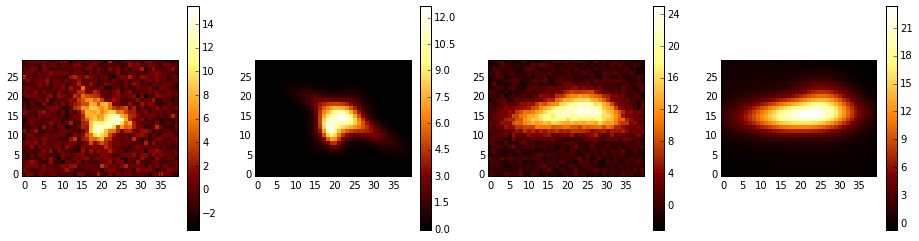

In [64]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_4.pdf")

album before 104651.115412
album after 101345.027216


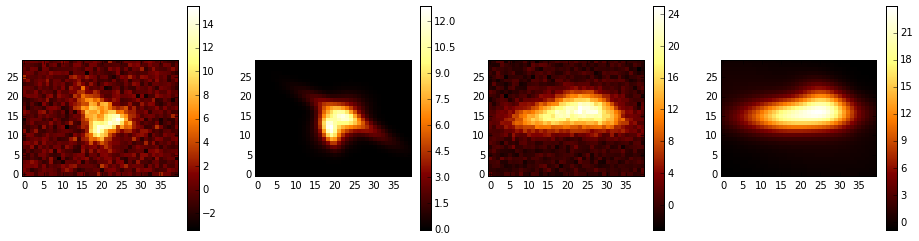

In [65]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_5.pdf")

image before 4224.53270856
image after 4115.73472899
image before 2232.88867143
image after 2186.62544217
image before 1880.30087758
image after 1708.61595029
image before 5786.76005427
image after 5467.10842985
image before 1919.56579537
image after 1858.83212877
image before 1283.44110442
image after 1277.25130405
image before 2632.87409782
image after 2600.82519305
image before 1338.29303374
image after 1324.80751939
image before 1861.16332239
image after 1845.20584367
image before 2165.38933513
image after 2054.30463655
image before 3915.65300236
image after 3873.357456
image before 1720.71846846
image after 1711.92378041
image before 2625.29506728
image after 2592.99013977
image before 5800.52604578
image after 5749.93389018
image before 2417.29955236
image after 2387.21455489
image before 4499.76850447
image after 4414.85305025
image before 1521.77932538
image after 1460.93971193
image before 3502.48809491
image after 3465.99251233
image before 2787.80746718
image after 2752.5545

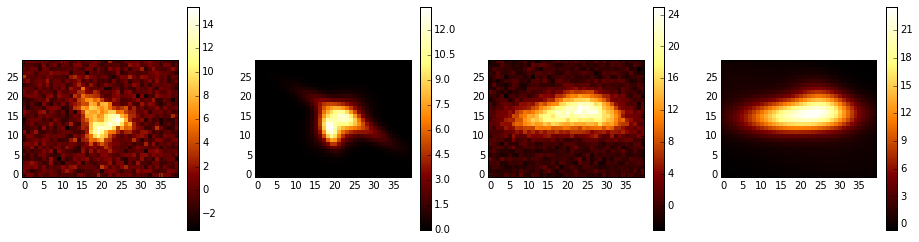

In [66]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_6.pdf")

album before 98604.8407394
album after 95546.4044952


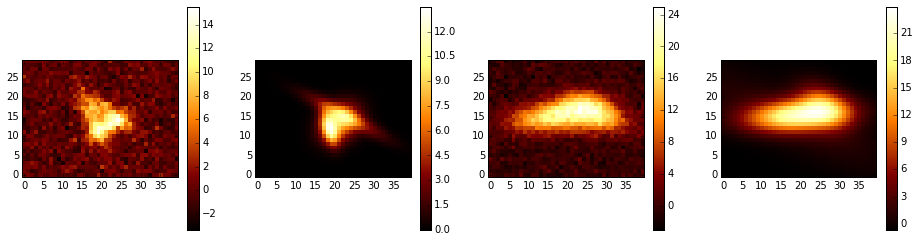

In [67]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_7.pdf")

image before 3705.27565342
image after 3517.20186251
image before 2277.77862108
image after 1948.95439785
image before 1465.81291574
image after 1444.08575022
image before 4722.83767439
image after 4451.79294908
image before 1912.74966308
image after 1851.6839433
image before 1249.67764015
image after 1224.73360623
image before 2714.35943402
image after 2661.4584027
image before 1301.1173898
image after 1273.62850833
image before 1845.0194389
image after 1829.36199324
image before 2078.6386401
image after 1985.98224123
image before 4034.3795978
image after 3889.25182978
image before 1709.59928289
image after 1689.83439823
image before 2700.15588774
image after 2627.0363676
image before 5826.02606682
image after 5701.95811436
image before 2299.1103819
image after 2250.0534663
image before 4383.73092291
image after 4210.12175406
image before 1515.49495736
image after 1463.18286785
image before 3443.9779469
image after 3317.29783989
image before 2719.24771603
image after 2652.44786979
ima

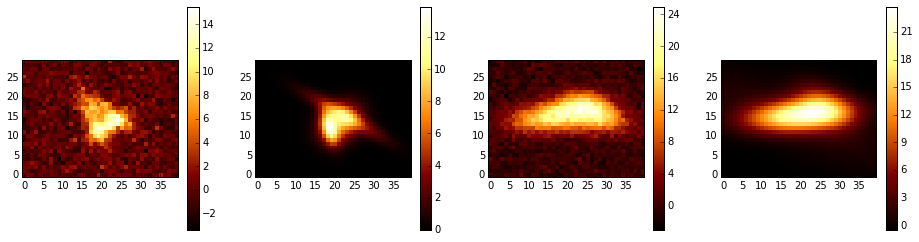

In [68]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_8.pdf")

album before 91122.0543149
album after 87908.2732927


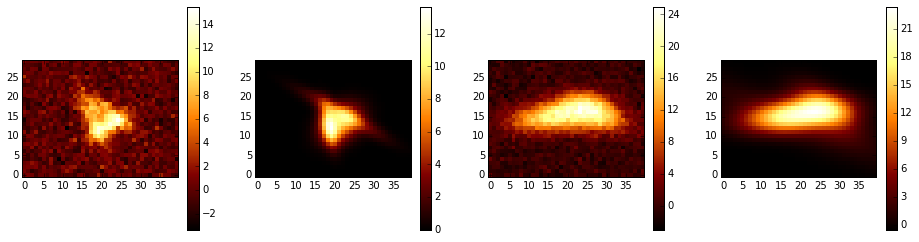

In [69]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_8.pdf")

image before 3440.51066441
image after 3304.88132074
image before 2008.87018954
image after 1928.13666856
image before 1368.05826486
image after 1347.66104387
image before 4031.91702514
image after 3485.04196338
image before 1729.01632668
image after 1667.71287985
image before 1231.10262461
image after 1222.50716673
image before 2781.61297982
image after 2647.57848549
image before 1245.30953331
image after 1230.05667963
image before 1789.256646
image after 1785.12003164
image before 1798.11841269
image after 1753.00262685
image before 3698.72684793
image after 3599.25372369
image before 1603.87948314
image after 1595.96636814
image before 2632.88040864
image after 2571.6290578
image before 5140.72871867
image after 5094.22236815
image before 2242.73200905
image after 2206.37933605
image before 4379.43568563
image after 4182.61958374
image before 1499.88431961
image after 1359.82974923
image before 3049.99547963
image after 2829.13694945
image before 2677.65828952
image after 2649.19738

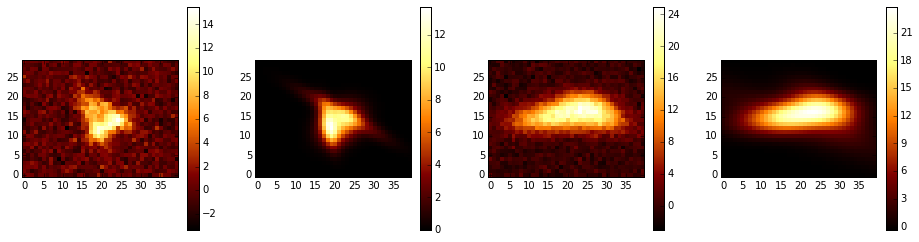

In [70]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_9.pdf")

album before 83870.5922002
album after 78231.5345102


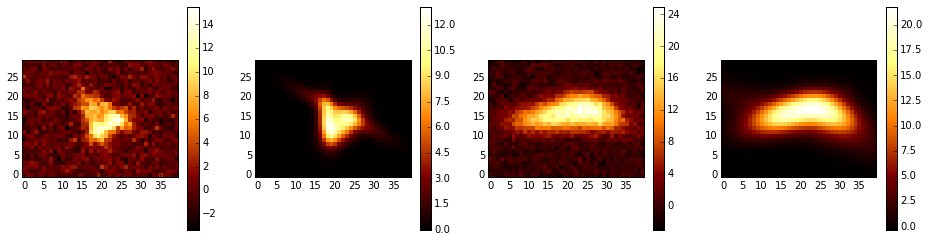

In [71]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
#showme(album)
showme_small(album, v=True)
#plt.savefig("/Users/dalyabaron/Copy/Astrophysics/python/new_scripts/new_scripts/DeprojectAllGalaxies/fitting_pngs/run_10.pdf")

In [20]:
print result

  status: 0
 success: True
   direc: array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00